# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО: Гордийчук Маргарита Андреевна

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет



# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [6]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [7]:
mnist.data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [8]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
type(mnist.target)

numpy.ndarray

In [11]:
type(mnist.data)

numpy.ndarray

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [12]:
from sklearn.model_selection import train_test_split #имя требуемой функции здесь

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42) #деление выборки
#random state from example in sklearn documentation for reproducibility

In [23]:
print(X_train.shape, mnist.data.shape, y_train)

(63000, 784) (70000, 784) ['8' '7' '6' ... '1' '0' '0']


In [13]:
print(X_test.shape, mnist.data.shape, y_test)

(7000, 784) (70000, 784) ['8' '4' '8' ... '5' '2' '6']


In [14]:
import matplotlib.pyplot as plt
import numpy as np

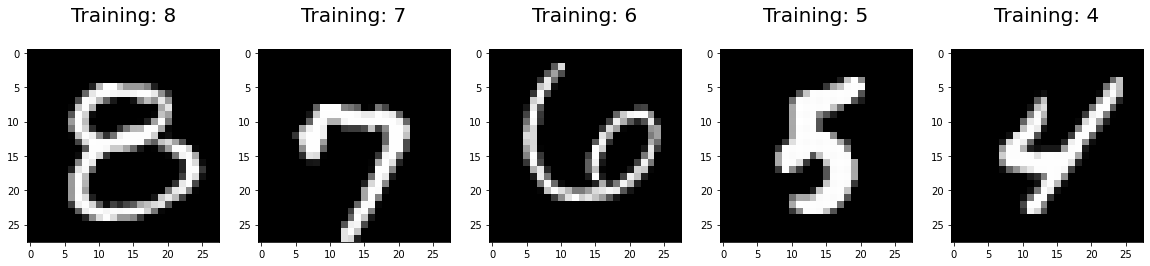

In [15]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [12]:
%%time
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
#укажите имена требуемых моделей

#ваш код здесь
from time import time

from typing import Callable, Union

try:
    from typing import Protocol
except ImportError:
    print('Python version is probably <3.8 ... Bye, Protocol.')

    Protocol = object

import tqdm


CPU times: user 37.8 ms, sys: 12.1 ms, total: 50 ms
Wall time: 60.4 ms


In [13]:
print("LogisticRegression, Ridge, Lasso learning times: ")
for model in [LogisticRegression, Ridge, Lasso]:
    model = model()
    start = time()
    x = model.fit(X_train, y_train)
    stop = time()
    print(stop - start)

LogisticRegression, Ridge, Lasso learning times: 


/home/rita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


49.58131527900696
2.965578317642212
16.91710901260376


"Как долго учились модели?" численно выше, быстрее всего Ridge, в 3 дольше Lasso и на порядок дольше LogisticRegression

**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

На полной выборке считалось буквально полчаса на каждый набор параметров, поэтому тут по аналогии с заданием на t-SNE возьмем первые 2000 значений

In [17]:
X_train_small, y_train_small = X_train[:2000], y_train[:2000]


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from time import time

time_kNN_start = time()
parameters = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9], 'weights': ["uniform" , "distance"]} # weights as two options from sklearn docs

svc = KNeighborsClassifier()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train_small, y_train_small)

time_kNN_stop = time()


In [24]:
print(time_kNN_stop - time_kNN_start)

53.17813587188721


In [40]:
X_test.shape

(7000, 784)

In [42]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [41]:
clf.best_estimator_.score(X_test[:1000], y_test[:1000])

0.904

In [31]:
from sklearn.ensemble import RandomForestClassifier

time_RFC_start = time()
parameters = {'n_estimators':[100, 200, 300, 400, 500, 600], 'criterion' : ['gini', 'entropy']}

rfc = RandomForestClassifier()

gr_rfc = GridSearchCV(rfc, parameters)
gr_rfc.fit(X_train_small, y_train_small)

time_RFC_stop = time()

gr_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [43]:
gr_rfc.best_estimator_.score(X_test[:1000], y_test[:1000])

0.908

In [32]:
print(time_RFC_stop - time_RFC_start)

164.2855167388916


In [38]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

time_GBC_start = time()

parameters = {'n_estimators':[100, 200], 'subsample': [1, 0.8]}

gbc = GradientBoostingClassifier()

gr_gbc = GridSearchCV(gbc, parameters)
gr_gbc.fit(X_train_small, y_train_small)

time_GBC_stop = time()
gr_gbc.best_estimator_

GradientBoostingClassifier(n_estimators=200, subsample=0.8)

In [36]:
print(time_GBC_stop - time_GBC_start)

2005.8356261253357


In [44]:
gr_gbc.best_estimator_.score(X_test[:1000], y_test[:1000])

0.893

Из-за того, что Gradient Boosting считался полчаса для 4 наборов параметров, качество модели в итоге получилось значительно хуже, чем у kNN и RandomForest

**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

In [ ]:
#ваше обоснование

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [ ]:
#ваш код и комментарии здесь

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [ ]:
from sklearn import metrics

conf_matrix = #ваша матрица, используя функцию из metrics

In [ ]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Понижаем размерность

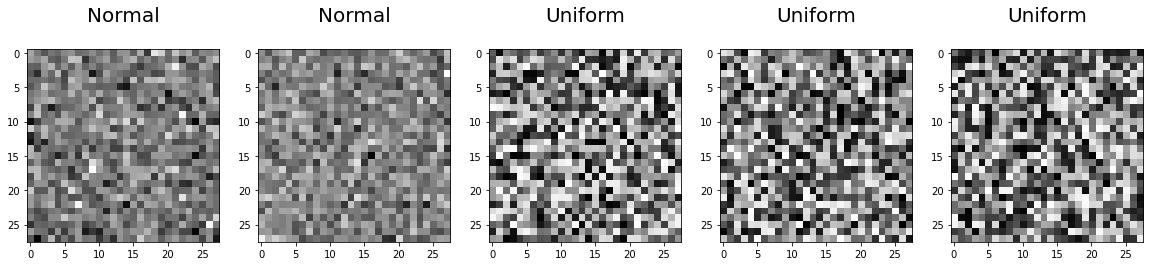

In [45]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

там в 3.2 надо сравнивать t-SNE с PCA по скорости, поэтому засекаем время

In [46]:
from sklearn.manifold import TSNE #ваш код здесь
from time import time

time_tSNE_start = time()
tsne_representation = TSNE(n_components=2).fit_transform(X_train[:2000])#и тут
time_tSNE_stop = time()

In [47]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train[:2000]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

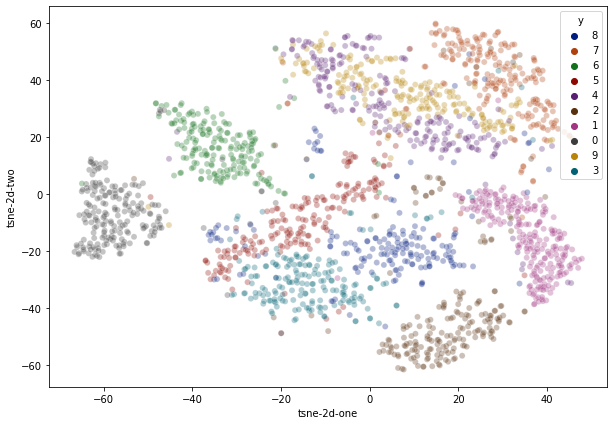

In [49]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [50]:
from sklearn.decomposition import PCA #дополните здесь

time_PCA_start = time()
pca_representation = PCA(n_components=2).fit_transform(X_train[:2000])
#ваш код здесь
time_PCA_stop = time()

<AxesSubplot:xlabel='pca-2d-one', ylabel='pca-2d-two'>

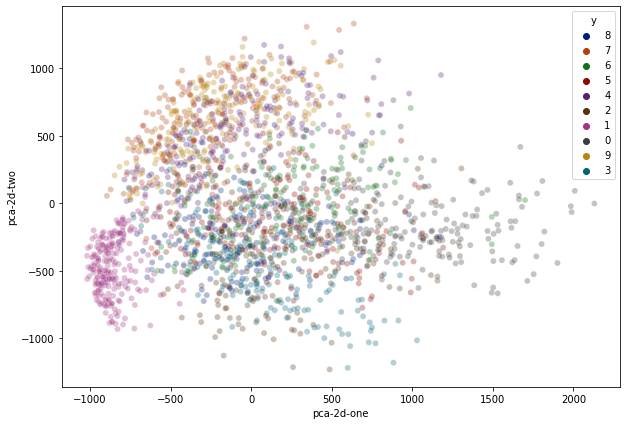

In [52]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

Качественная оценка кластеризации : PCA хуже, t-SNE лучше;
Сравнение по времени:

In [53]:
print("Время работы t-SNE, сек", time_tSNE_stop - time_tSNE_start)
print("Время работы PCA, сек", time_PCA_stop - time_PCA_start)

Время работы t-SNE, сек 9.092629671096802
Время работы PCA, сек 0.1486210823059082


PCA быстрее и хуже, t-SNE медленнее и лучше

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [55]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,-35.107086,-29.862774,8
1,25.851311,55.883953,7
2,-20.447353,30.652855,6
3,-14.999897,-11.387894,5
4,21.776094,19.477957,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [56]:
tsne_repr.iloc[:, 0:2]

,tsne-2d-one,tsne-2d-two
0,-35.107086,-29.862774
1,25.851311,55.883953
2,-20.447353,30.652855
3,-14.999897,-11.387894
4,21.776094,19.477957
...,...,...
1995,-59.670929,-6.430974
1996,23.086693,-44.702202
1997,0.073967,-43.502750
1998,17.193981,48.083012


In [62]:
from sklearn.cluster import DBSCAN #ваш код здесь и далее
# радиус окрестности eps - варьируем и смотрим, какое макс значение в dbscan_repr,
# минимальное количество объектов в корневой точке = min_samples - 55
dbscan_repr = DBSCAN(eps=6.9, min_samples=55).fit_predict(tsne_repr.iloc[:, 0:2])

#предсказания меток dbscanом

In [63]:
print(max(dbscan_repr))

8


**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**
Да вроде адекватно, на t-SNE примерно 20 диаметры многих кластеров, но из-за того, что они не сферические, полагаю, получилось меньше число

Посмотрим, насклько качественно отработал DBSCAN

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

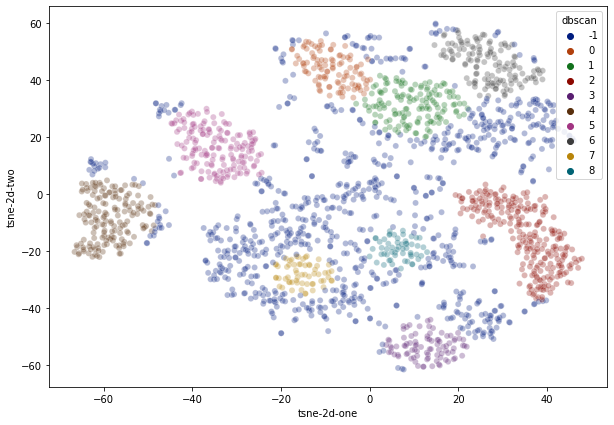

In [64]:
tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

Многие выбросы чисто визуально можно было бы и включить в кластеры

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [65]:
#ваш код, графики и выводы здесь
# не поняла что такое крутой спуск
from time import time

mnist.data.shape
time_PCA_all_start = time()
pca_all = PCA()
pca_all.fit_transform(mnist.data)
time_PCA_all_stop = time()

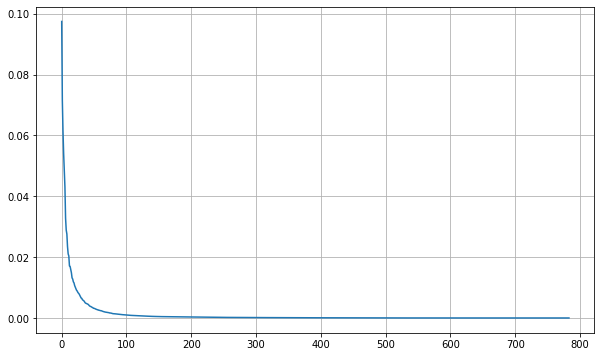

In [66]:
plt.figure(figsize = (10, 6))
plt.plot(pca_all.explained_variance_ratio_)
plt.grid()

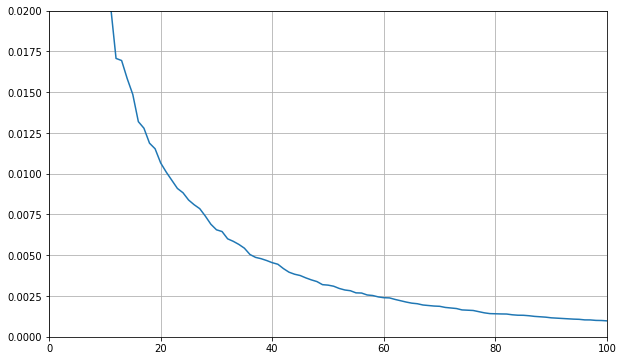

In [67]:
plt.figure(figsize = (10, 6))
plt.plot(pca_all.explained_variance_ratio_)
plt.xlim(0, 100)
plt.ylim(0, 0.02)
plt.grid(which = 'both')

Можно считать, что перелом приходится на примерно 40 компонент, а значит реальная размерность данных тоже около 40, раз большая часть вариации объясняется таким числом компонент

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

In [69]:
from time import time

mnist.data.shape
time_PCA_all_start = time()
pca_all = PCA(n_components = 40)
pca_all.fit_transform(mnist.data)
time_PCA_all_stop = time()

In [70]:
type(pca_all)

sklearn.decomposition._pca.PCA

In [75]:

X_train_40 = pca_all.transform(X_train)
X_test_40 = pca_all.transform(X_test)


In [74]:

y_train_40 = pca_all.transform(y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[8. 7. 6. ... 1. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [76]:
X_train_40.shape, y_train.shape

((63000, 40), (63000,))

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [77]:
#ваш код здесь

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from time import time

time_kNN_start = time()
parameters = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9], 'weights': ["uniform" , "distance"]} # weights as two options from sklearn docs

svc = KNeighborsClassifier()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train_40[:2000], y_train[:2000])

time_kNN_stop = time()

In [78]:
clf.best_estimator_.score(X_test_40[:1000], y_test[:1000])

0.921

Было 0.904, стало 0.921, даже улучшилось с понижением размерности

In [79]:
from sklearn.ensemble import RandomForestClassifier

time_RFC_start = time()
parameters = {'n_estimators':[100, 200, 300, 400, 500, 600], 'criterion' : ['gini', 'entropy']}

rfc = RandomForestClassifier()

gr_rfc = GridSearchCV(rfc, parameters)
gr_rfc.fit(X_train_40[:2000], y_train[:2000])

time_RFC_stop = time()

gr_rfc.best_estimator_

RandomForestClassifier(n_estimators=600)

In [80]:
gr_rfc.best_estimator_.score(X_test_40[:1000], y_test[:1000])

0.887

А вот тут было лучше 0.908, стало хуже

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

time_GBC_start = time()

parameters = {'n_estimators':[100, 200], 'subsample': [1, 0.8]}

gbc = GradientBoostingClassifier()

gr_gbc = GridSearchCV(gbc, parameters)
gr_gbc.fit(X_train_40[:2000], y_train[:2000])

time_GBC_stop = time()
gr_gbc.best_estimator_

GradientBoostingClassifier(n_estimators=200, subsample=0.8)

In [82]:
gr_gbc.best_estimator_.score(X_test_40[:1000], y_test[:1000])

0.866

Опять ухудшилось с 0.893 до 0.866, но не слишком сильно, учитывая, что мы понизили размерность с 784 до 40

In [84]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso

print("LogisticRegression, Ridge, Lasso learning times: ")
for model in [LogisticRegression, Ridge, Lasso]:
    model = model()
    start = time()
    x = model.fit(X_train, y_train)
    print(x.score(X_test, y_test), "score")
    stop = time()
    print(stop - start, "times")

LogisticRegression, Ridge, Lasso learning times: 


/home/rita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9195714285714286 score
22.967164993286133 times
0.5871683144508124 score
1.0491204261779785 times
0.6093930649035093 score
3.6067354679107666 times


In [85]:

print("LogisticRegression, Ridge, Lasso: ")
for model in [LogisticRegression, Ridge, Lasso]:
    model = model()
    start = time()
    x = model.fit(X_train_40, y_train)
    print(x.score(X_test_40, y_test), "score")
    stop = time()
    print(stop - start, "times")

LogisticRegression, Ridge, Lasso: 
0.9005714285714286 score
6.137040138244629 times
0.5460473897012311 score
0.06638789176940918 times
0.5460984961946027 score
0.08396577835083008 times


/home/rita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Все линейные модели ухудшили качество, но опять же, не сильно, как могло бы показаться при таком уменьшении размерности

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

Вообще не понятно из условия, но судя по тому, что это все еще пункт 6, мы работаем с уменьшенной размерностью
Опять же, тогда не понятно, что сначала, Scaler или PCA, предполагаю что Scaler

In [86]:
#ваш код здесь
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(mnist.data)

X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)





In [87]:
X_train_40_ss = pca_all.transform(X_train_ss)
X_test_40_ss = pca_all.transform(X_test_ss)


In [88]:
#ваш код здесь

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from time import time

time_kNN_start = time()
parameters = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9], 'weights': ["uniform" , "distance"]} # weights as two options from sklearn docs

svc = KNeighborsClassifier()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train_40_ss[:2000], y_train[:2000])

time_kNN_stop = time()

In [90]:
clf.best_estimator_.score(X_test_40_ss[:1000], y_test[:1000])

0.911

In [91]:
from sklearn.ensemble import RandomForestClassifier

time_RFC_start = time()
parameters = {'n_estimators':[100, 200, 300, 400, 500, 600], 'criterion' : ['gini', 'entropy']}

rfc = RandomForestClassifier()

gr_rfc = GridSearchCV(rfc, parameters)
gr_rfc.fit(X_train_40_ss[:2000], y_train[:2000])

time_RFC_stop = time()

gr_rfc.best_estimator_

RandomForestClassifier(n_estimators=600)

In [92]:
gr_rfc.best_estimator_.score(X_test_40_ss[:1000], y_test[:1000])

0.874

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

time_GBC_start = time()

parameters = {'n_estimators':[100, 200], 'subsample': [1, 0.8]}

gbc = GradientBoostingClassifier()

gr_gbc = GridSearchCV(gbc, parameters)
gr_gbc.fit(X_train_40_ss[:2000], y_train[:2000])

time_GBC_stop = time()
gr_gbc.best_estimator_

GradientBoostingClassifier(n_estimators=200, subsample=1)

In [94]:
gr_gbc.best_estimator_.score(X_test_40_ss[:1000], y_test[:1000])

0.88

In [98]:
print("время работы даже на 2000 значениях", time_GBC_stop - time_GBC_start)

время работы даже на 2000 значениях 546.0762629508972


In [95]:
print("LogisticRegression, Ridge, Lasso: ")
for model in [LogisticRegression, Ridge, Lasso]:
    model = model()
    start = time()
    x = model.fit(X_train_40_ss, y_train)
    print(x.score(X_test_40_ss, y_test), "score")
    stop = time()
    print(stop - start, "times")

LogisticRegression, Ridge, Lasso: 
0.8664285714285714 score
6.482646703720093 times
0.5506695683515856 score
0.07081198692321777 times
0.3968071603413077 score
0.10323858261108398 times


/home/rita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Итог** Все модели, кроме линейных, считали на 2000 значений, потому что GradientBoostingClassifier считал под полчаса один набор параметров. Все остальные модели считали все равно на 2000, чтобы были равные условия

Динамика качества для моделей при: 1. сырых данных, 2. данных с пониженной размерностью, 3. z-scored(отцентрованных) данных с пониженной размерностью

LogisticRegression: 0.919, 0.900, 0.866

Ridge: 0.587, 0.546, 0.550

Lasso: 0.609, 0.546, 0.396

kNN: 0.904, 0.921, 0.911

RandomForestClassifier: 0.908, 0.887, 0.874

GradientBoostingClassifier: 0.893, 0.866, 0.880

Значительное понижение размерности данных (с 784 до 40, то есть в примерно 20 раз), подобранное с помощью PCA, не сильно повлияло на точность моделей, а в случае с kNN даже увеличило ее. StandartScaler тоже не особенно повлиял на точность(только в случае Lasso она сильно упала), для GradientBoostingClassifier она даже увеличилась